### Initial value problems (IVPs) of Differential equations
* Ordinary differential equation: one independent variable
 * ODE + initial condition is an initial value problem
 * initial condition is solution at an initial time

* Common tools: **Runge-Kutta**

ODE: $\frac{dy}{dt} = f(t,y)\; $
IC: $y_0 = y(0)$

**Euler method (RK1):**
* Most basic method to solve
* Stepping method to compute next value 

1. Compute approximate derivative with simple forward difference
    $$\frac{dy}{dt} = f(t,y)\; \rightarrow \frac{y_{n+1} - y_n}{h}\approx f(t_n, y_n)$$
2. Use $y_n$ and $t_n$ to compute $y_{n+1}$
    $$ y_{n+1} = y_n + h f(t_n, y_n)$$
3. Continue until end of t

** Euler-Cauchy(RK2):**

1. Compute derivative at initial time (left side of interval)
$$rate_{left} = f(t, y(t)) = f_0$$
2. Use derivative to calculate estimate of derivative at middle of interval
$$y_{mid} = y(t) + \frac{h}{2} rate_{left}$$
3. use mid interval value to estimate rate of change over interval
$$rate_{mid} = f(t+\frac{h}{2}, y_{mid}) = f_1$$
4. Put it all together to calcuate $y_{n+1}$
$$y_{RK2}(t+h) = y(t)+h f\big(t+\frac{h}{2}, y(t)+\frac{h}{2} \; f(t,y(t)) \big)$$

**Runge-Kutta(RK4):**
* most common 

$$y_{n+1} = y_n + \frac{h}{6} [f_1 + 2 f_2 +2 f_3 + f_4]$$

**Runge Kutta Fehlberg (RKF45):**
* combines 4th and 5th order with adaptive stepsize to reduce error
* self starting and no need for $y_{n-1}$ information


In [1]:
# code for 1st order RK ODE solvers

import numpy as np 
import matplotlib.pyplot as plt

def euler_step(f,y,t0,t1):
    """
    compute next value for Euler's method ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    f0 = f(y,t0)
    h = (t1-t0)
    y_new = y + h*f0
    return y_new

def rk2_step(f,y,t0,t1):
    """
    compute next value for 2nd-order Runge-Kutta method ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    f0 = f(y,t0)
    h  = t1-t0
    
    #compute euler estimate for half step
    y1 = y + 0.5*h*f0
    t1 = t0 + 0.5*h
    
    #compute midstep rate estimate
    f1 = f(y1,t1)
    
    #take full step using midstep rate estimate 
    y_new = y + h*f1
    return y_new

def rk4_step(f,y,t0,t1):
    """
    compute next value for 4th-order Runge-Kutta method ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    # compute step size
    h  = t1-t0

    # compute k1
    k1 = f(y, t0)
    
    # compute k2
    k2 = f(y + h*k1/2, t0+ h/2)
    
    # cimpute k3
    k3 = f(y + h*k1/2, t0 + h/2)

    # compute k4
    k4 = f(y + h*k3, t0+h)
    
    #take full step using midstep rate estimate 
    y_new = y + h/6 * (k1 + 2*k2 + 2*k3 + k4)

    return y_new

def rk_solve(f,y0,t,order=4):
    """
    Runge-Kutta solver for systems of 1st order ODEs
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y0: numpy array of initial float values of dependent variable
        t: numpy array of float values of independent variable
        order: int order of RK solver with allowed values [1,2,4]
        
    Returns:
        y: 2D numpy array of float values of dependent variable
    """
    if 1 == order:
        step_method =  euler_step
    elif 2 == order:
        step_method = rk2_step
    elif 4 == order:
        step_method = rk4_step
    else:
        print("Requested order not in [1,2,4]") 

    n = t.size
    m = y0.size #determine size of the dependent variable array
    y = [y0] #list to store 1D numpy array for each time
    for i in range(n-1):
        y_new = step_method(f,y[i],t[i],t[i+1]) #compute next step as before
        y.append(y_new)
        #NOTICE: For numpy array, would need loop to assign values into y one element at a time
        #for j in range(m): 
            #y[i+1,j] = y_new[j]
    return np.array(y)


**Lotka_volterra:**
* Equations representing predator and prey 
Predetor equation

$ dx/dt = \alpha x - \beta x y$

Prey equation

$dy/dt = \delta x y - \gamma y$

* After rewrite to vector of single variable

$\begin{aligned}
y_0' &= \alpha y_0 - \beta y_0 y_1 \\ 
y_1' &= -\gamma y_0 +\delta y_0 y_1
\end{aligned}$


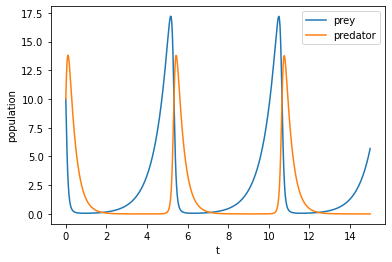

In [2]:
alpha = 1.5
beta = 1.0
gamma = 3.0
delta = 1.0
rhs = lambda y,t: np.array([alpha * y[0] - beta*y[0]*y[1], delta*y[0]*y[1] - gamma*y[1]])
steps = 500
y0 = np.array([10., 10.])
t = np.linspace(0,15,steps+1)
y = rk_solve(rhs, y0, t, 4)
exact = np.cos(t)
error = exact - y.T[0]
plt.plot(t, y.T[0], label="prey")
plt.plot(t, y.T[1], label="predator")
plt.xlabel("t")
plt.ylabel("population")
plt.legend()
plt.show()


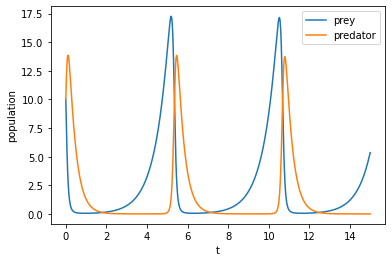

In [19]:
# built in functions
from scipy import integrate

def lotka_volterra(t, y):
    return np.array([alpha * y[0] - beta*y[0]*y[1], delta*y[0]*y[1] - gamma*y[1]])

alpha = 1.5
beta = 1.0
gamma = 3.0
delta = 1.0
steps = 500
y0 = np.array([10., 10.])
t0 = 0
tf = 15
t = np.linspace(0,15,steps+1)
sol = sp.integrate.solve_ivp(lotka_volterra, t_span=(t0,tf), y0=y0, method='RK45', t_eval=t)
plt.plot(t, sol.y[0], label="prey")
plt.plot(t, sol.y[1], label="predator")
plt.xlabel("t")
plt.ylabel("population")
plt.legend()
plt.show()

# This solver returns an object

### ODE forms 1st order: 
$ \frac{dy}{dt} = \lambda y$

$\lambda < 0$: exponential decay? 

$\lambda > 0$: exponential growth

**Additional depedent variables:**
* Consider dependent variable to be a vector
$$\frac{d \boldsymbol{y}}{dt} = \frac{d}{dt} \begin{pmatrix} y_0\\y_1\\y_2 \end{pmatrix}   = \begin{pmatrix} y_1\\y_2\\-y_0^2 y_1 -cos(t) y_0 + sin(t) \end{pmatrix} = f(\boldsymbol{y}, t)$$



In [ ]:
# for above multiple dependent variables
rhs = lambda y,t: np.array([y[1],y[2],-y[0]**2 *y[1]-np.cos(t)*y[0]+np.sin(t)])

y0 = np.array([1,0,0])

### ODE forms higher order:
* for n degree equation:
    * introduce an array of $n$ variables corresponding to each variable and its first order derivaties
    * This makes a system of $n$ 1st order derivative equations
    * The $nth$ equation in the system becomes the original equaiton in terms of new variables. 


### Error analysis

Differential equation has a continuously variable independent variable domain.
* All methods require breakdown into discrete time steps(discritization)
* Iteration formula: formula for calculating the next independent variable

**Explicit method/forward euler method:**
* the iteration formula specifies $y_{n+1}$ as an explicit function of values
* has 1st order globral trunction error and 2nd order local truncation error (because 2nd order forward difference scheme)
* for $\lambda < -10$: need sufficiently small step size or it wont converge
* Only stable for $ -2 < \lambda h < 0$
* method is not computationally expensive

**Implicit method/backwards euler method:**
* Instead of $y'(t_n) = \frac{1}{h} (y_{n+1}-y_n)$, 
    use $y'(t_{n+1}) = \frac{1}{h} (y_{n+1}-y_n)$ to obtain: $$y_{n+1} = y_n + h f(t_n, y_{n+1})$$
* method is stable everywhere else when $ 0 < \lambda h < 2$

**Predictor-corrector methods:**
* Better solution for systems not stable in forward euler
* Adams-bashforth
* Adams-Moulton 


In [ ]:
### Boundary value problems (BVPs)

$$\frac{d^2 y}{dt^2} = f \big(t, y, \frac{dy}{dt} \big)$$

with boundary conditions

$$\alpha_1 y(a) + \beta_1 \frac{dy(a)}{dt} & = \gamma_1 \\
\alpha_2 y(b) + \beta_2 \frac{dy(b)}{dt} & = \gamma_2$$

* conditions are specified at endpoints




